In [13]:
import pandas as pd 
import helpers
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [10]:
path = "../Data/dataset/restaurant_reviews.csv"
df = pd.read_csv(path)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [12]:
df.isnull().sum()

Restaurant       0
Reviewer        38
Review          45
Rating          38
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

In [48]:
df = df.drop(["Reviewer","Metadata", "Time", "Pictures", "7514"], axis=1)
df

,Restaurant,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4


In [49]:
df.isnull().sum()

Restaurant     0
Review        45
Rating        38
dtype: int64

In [50]:
null_rows = df.loc[df['Review'].isnull() | df['Rating'].isnull()]

null_rows

,Restaurant,Review,Rating
2360,Amul,NaN,5
5799,Being Hungry,NaN,5
6449,Hyderabad Chefs,NaN,5
6489,Hyderabad Chefs,NaN,5
7954,Olive Garden,NaN,3
8228,Al Saba Restaurant,NaN,5
8777,American Wild Wings,NaN,NaN
8778,American Wild Wings,NaN,NaN
8779,American Wild Wings,NaN,NaN
8780,American Wild Wings,NaN,NaN


In [51]:
#Review yazmayip olup rating veren var mi? 
null_review_notnull_rating = df.loc[df['Review'].isnull() & df['Rating'].notnull()]

null_review_notnull_rating

,Restaurant,Review,Rating
2360,Amul,NaN,5
5799,Being Hungry,NaN,5
6449,Hyderabad Chefs,NaN,5
6489,Hyderabad Chefs,NaN,5
7954,Olive Garden,NaN,3
8228,Al Saba Restaurant,NaN,5
8844,Domino's Pizza,NaN,5


In [52]:
#Rate vermeyip review yazan var mi? 
null_rating_notnull_review = df.loc[df['Review'].notnull() & df['Rating'].isnull()]

null_rating_notnull_review

,Restaurant,Review,Rating


In [53]:
df = df.dropna(subset=["Review"])
df

,Restaurant,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4


In [54]:
df.isnull().sum()

Restaurant    0
Review        0
Rating        0
dtype: int64

In [55]:
df.tail()

,Restaurant,Review,Rating
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4
9999,Chinese Pavilion,Checked in here to try some delicious chinese ...,3.5


In [56]:
df = df.reset_index(drop=True)

In [57]:
df['Edited_Review'] = df['Review'].replace('\n', ' ', regex=True)
df

,Restaurant,Review,Rating,Edited_Review
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"The ambience was good, food was quite good . h..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,Ambience is too good for a pleasant evening. S...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,A must try.. great food great ambience. Thnx f...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,Soumen das and Arun was a great guy. Only beca...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,Food is good.we ordered Kodi drumsticks and ba...
...,...,...,...,...
9950,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,Madhumathi Mahajan Well to start with nice cou...
9951,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,This place has never disappointed us.. The foo...
9952,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"Bad rating is mainly because of ""Chicken Bone ..."
9953,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,I personally love and prefer Chinese Food. Had...


In [58]:
df['Edited_Review'] = df['Edited_Review'].apply(helpers.clean_text)

In [59]:
#df.to_csv("asd.csv")

In [60]:
df['Edited_Review'] = df['Edited_Review'].str.replace(r'\s+', ' ', regex=True)

In [61]:
df['Edited_Review'].head(100)

0     The ambience was good, food was quite good . h...
1     Ambience is too good for a pleasant evening. S...
2     A must try.. great food great ambience. Thnx f...
3     Soumen das and Arun was a great guy. Only beca...
4     Food is good.we ordered Kodi drumsticks and ba...
                            ...                        
95    Was there for office lunch outing. Rating woul...
96    I really enjoyed the follows. The entrance, th...
97    I came first time in this restaurant. The entr...
98    Pathetic and horrible experience Ambience and ...
99    Ahmed was serving us. Polite and very cooperat...
Name: Edited_Review, Length: 100, dtype: object

In [62]:
df['language'] = df['Edited_Review'].apply(helpers.safe_detect)
df

,Restaurant,Review,Rating,Edited_Review,language
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"The ambience was good, food was quite good . h...",en
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,Ambience is too good for a pleasant evening. S...,en
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,A must try.. great food great ambience. Thnx f...,en
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,Soumen das and Arun was a great guy. Only beca...,en
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,Food is good.we ordered Kodi drumsticks and ba...,en
...,...,...,...,...,...
9950,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,Madhumathi Mahajan Well to start with nice cou...,en
9951,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,This place has never disappointed us.. The foo...,en
9952,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"Bad rating is mainly because of ""Chicken Bone ...",en
9953,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,I personally love and prefer Chinese Food. Had...,en


In [63]:
df.loc[df['language'] != "en"] 

,Restaurant,Review,Rating,Edited_Review,language
284,Flechazo,Sabir excellent service fish verry good AND di...,5,Sabir excellent service fish verry good AND di...,sl
312,Shah Ghouse Hotel & Restaurant,biryani was oily,3,biryani was oily,sw
348,Shah Ghouse Hotel & Restaurant,delivered on time,5,delivered on time,da
367,Shah Ghouse Hotel & Restaurant,not good,1,not good,af
534,The Fisherman's Wharf,Very bad,1,Very bad,so
...,...,...,...,...,...
9839,Triptify,Needs more salt,4,Needs more salt,da
9843,Triptify,late,2,late,ro
9845,Triptify,fast delivery,5,fast delivery,da
9846,Triptify,Food was awesome,5,Food was awesome,af


In [64]:
df.loc[df['language'] == "unknown"]


,Restaurant,Review,Rating,Edited_Review,language
1577,KFC,ok,4,ok,unknown
1583,KFC,😄,5,😄,unknown
2090,13 Dhaba,D,5,D,unknown
2361,Amul,su,5,su,unknown
3575,Green Bawarchi Restaurant,gd,4,gd,unknown
3582,Green Bawarchi Restaurant,5,5,5,unknown
3584,Green Bawarchi Restaurant,ok,4,ok,unknown
3593,Green Bawarchi Restaurant,cc,5,cc,unknown
3735,Kritunga Restaurant,4,4,4,unknown
3742,Kritunga Restaurant,o,5,o,unknown


In [65]:
df.iloc[284]["Review"]

'Sabir excellent service fish verry good AND diessart ossam sabir kusal jaki services excellent service isjejiiuhjwkwjjjekejekek.........👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏mjhfjkksjdjjrjdkedidj'

In [66]:
filtered_df = df.loc[df['language'] != "en"] 
df = df.drop(filtered_df.index)
df = df.reset_index(drop=True)


In [67]:
df.iloc[284]["Review"]

'Great ambience.\nGood food.\nService is polite and friendly.\nRanjan ,Raveendra and Karthik are very friendly to the customers.\n\nMore variety of non veg items are available.\n\nWould like to visit again.'

In [68]:
df.iloc[284]["Edited_Review"]

'Great ambience. Good food. Service is polite and friendly. Ranjan ,Raveendra and Karthik are very friendly to the customers. More variety of non veg items are available. Would like to visit again.'

In [69]:
df.tail()

,Restaurant,Review,Rating,Edited_Review,language
8978,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,Madhumathi Mahajan Well to start with nice cou...,en
8979,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,This place has never disappointed us.. The foo...,en
8980,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"Bad rating is mainly because of ""Chicken Bone ...",en
8981,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,I personally love and prefer Chinese Food. Had...,en
8982,Chinese Pavilion,Checked in here to try some delicious chinese ...,3.5,Checked in here to try some delicious chinese ...,en


In [70]:
df['Edited_Review'].str.split().explode().value_counts()

Edited_Review
the          18045
and          17006
was          10150
to            9762
is            9122
             ...  
dosh             1
WhyWhyWhy        1
Nihari.          1
Paani.           1
price..)         1
Name: count, Length: 36260, dtype: int64

In [28]:
df['Edited_Review'] = df['Edited_Review'].str.lower()
df

,Restaurant,Review,Rating,Edited_Review,language
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"the ambience was good, food was quite good . h...",en
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,ambience is too good for a pleasant evening. s...,en
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,a must try.. great food great ambience. thnx f...,en
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,soumen das and arun was a great guy. only beca...,en
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,food is good.we ordered kodi drumsticks and ba...,en
...,...,...,...,...,...
8981,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,madhumathi mahajan well to start with nice cou...,en
8982,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,this place has never disappointed us.. the foo...,en
8983,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"bad rating is mainly because of ""chicken bone ...",en
8984,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,i personally love and prefer chinese food. had...,en


In [128]:
#pd.set_option('display.max_rows', None) 
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

#df

In [129]:
#pd.reset_option('all')

In [130]:
including_smiling_face = df.loc[df['Edited_Review'].str.contains(":\)")]
including_smiling_face

<>:1: SyntaxWarning: invalid escape sequence '\)'
<>:1: SyntaxWarning: invalid escape sequence '\)'
/var/folders/6m/ym3_2fk172zf4t8bql8zbq_w0000gn/T/ipykernel_5741/2675594369.py:1: SyntaxWarning: invalid escape sequence '\)'
  including_smiling_face = df.loc[df['Edited_Review'].str.contains(":\)")]


,Restaurant,Review,Rating,Edited_Review,language
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,a must try.. great food great ambience. thnx f...,en
11,Beyond Flavours,"Very good ambience, amazing food ,good service...",5,"very good ambience, amazing food ,good service...",en
20,Beyond Flavours,"Beautiful, cozy and classy at the same time, t...",5,"beautiful, cozy and classy at the same time, t...",en
138,Paradise,As always the best food and service :) and chi...,5,as always the best food and service :) and chi...,en
246,Flechazo,Ambience is awesome especially Faijul service ...,5,ambience is awesome especially faijul service ...,en
...,...,...,...,...,...
8796,Triptify,A very nice option for Paranthas lovers with s...,5,a very nice option for paranthas lovers with s...,en
8847,Triptify,awesome quality. have try once... its really m...,5,awesome quality. have try once... its really m...,en
8901,Chinese Pavilion,We have been here on weekend afternoon for lun...,3,we have been here on weekend afternoon for lun...,en
8905,Chinese Pavilion,One of the best Chinese restaurants in Hyderab...,5,one of the best chinese restaurants in hyderab...,en


In [131]:
including_sad_face = df.loc[df['Edited_Review'].str.contains(":\(")]
including_sad_face

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
/var/folders/6m/ym3_2fk172zf4t8bql8zbq_w0000gn/T/ipykernel_5741/3732904311.py:1: SyntaxWarning: invalid escape sequence '\('
  including_sad_face = df.loc[df['Edited_Review'].str.contains(":\(")]


,Restaurant,Review,Rating,Edited_Review,language
30,Beyond Flavours,"Short review: Decent breads and starters, bad ...",3,"short review: decent breads and starters, bad ...",en
1036,Sardarji's Chaats & More,Ordered via Zomato delivery. Great taste and p...,4,ordered via zomato delivery. great taste and p...,en
1337,The Lal Street - Bar Exchange,This place is something you can never get bore...,4,this place is something you can never get bore...,en
1733,10 Downing Street,"This place is sooo good in everything food, am...",4,"this place is sooo good in everything food, am...",en
2090,Jonathan's Kitchen - Holiday Inn Express & Suites,"After hearing from friends, we planned to visi...",2,"after hearing from friends, we planned to visi...",en
2336,SKYHY,"Nice ambience, great service by Sahu Bhaiya. T...",4,"nice ambience, great service by sahu bhaiya. t...",en
4389,Shanghai Chef 2,I ordered with them yesturday and got chicken ...,1,i ordered with them yesturday and got chicken ...,en
4489,Udipi's Upahar,"we have ordered rava dosa ,rava masala and ghe...",3,"we have ordered rava dosa ,rava masala and ghe...",en
5116,Cafe Eclat,Modified the rating after the second visit sin...,3,modified the rating after the second visit sin...,en
5563,PourHouse7,Rated 4.1 on zomato. quite disappointed. Frida...,2,rated 4.1 on zomato. quite disappointed. frida...,en


In [132]:
including_diagonal_mouth = df.loc[df['Edited_Review'].str.contains(":\/")]
including_diagonal_mouth

<>:1: SyntaxWarning: invalid escape sequence '\/'
<>:1: SyntaxWarning: invalid escape sequence '\/'
/var/folders/6m/ym3_2fk172zf4t8bql8zbq_w0000gn/T/ipykernel_5741/3429349104.py:1: SyntaxWarning: invalid escape sequence '\/'
  including_diagonal_mouth = df.loc[df['Edited_Review'].str.contains(":\/")]


,Restaurant,Review,Rating,Edited_Review,language
366,Shah Ghouse Hotel & Restaurant,"To sum it up - ""Amazingly Delicious"".\n\nWe or...",4,"to sum it up - ""amazingly delicious"". we order...",en
2448,Tiki Shack,"Tiki Shak, Gachibowli - Hyderabad\n\nThe Gachi...",4,"tiki shak, gachibowli - hyderabad the gachibow...",en
4410,Shanghai Chef 2,Food was okay. We ordered two chicken dishes f...,3,food was okay. we ordered two chicken dishes f...,en
4609,Gal Punjab Di,Love the food here.. but not today :/\nDahi ke...,3,love the food here.. but not today :/ dahi ke ...,en
5956,Komatose - Holiday Inn Express & Suites,Komatose! Sigh.... :(\nI had high expectations...,3,komatose! sigh. :( i had high expectations by ...,en
6890,The Old Madras Baking Company,"Just your normal cafe, nothing out of the ordi...",3,"just your normal cafe, nothing out of the ordi...",en


In [133]:
df['Edited_Review'] = df['Edited_Review'].apply(helpers.detect_smiley)
df

,Restaurant,Review,Rating,Edited_Review,language
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"the ambience was good, food was quite good . h...",en
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,ambience is too good for a pleasant evening. s...,en
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,a must try.. great food great ambience. thnx f...,en
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,soumen das and arun was a great guy. only beca...,en
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,food is good.we ordered kodi drumsticks and ba...,en
...,...,...,...,...,...
8974,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,madhumathi mahajan well to start with nice cou...,en
8975,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,this place has never disappointed us.. the foo...,en
8976,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"bad rating is mainly because of ""chicken bone ...",en
8977,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,i personally love and prefer chinese food. had...,en


In [71]:
df.iloc[5957]['Review']

"For vegetarians,\nI feel place is definitely overrated. Not much options available. Taste is kind of ok, not great definitely. Price don't go well with the food.\nI doubt Zomato ratings seriously."

In [72]:
df.iloc[5957]['Edited_Review']

"For vegetarians, I feel place is definitely overrated. Not much options available. Taste is kind of ok, not great definitely. Price don't go well with the food. I doubt Zomato ratings seriously."

In [136]:
#demoji.findall(df.iloc[21]['Review'])

In [137]:
all_emoji_set = set()
df['Edited_Review'].apply(lambda x: all_emoji_set.update(helpers.extract_emojis(x).keys() if helpers.extract_emojis(x) else []))
all_emoji_set


{'3️⃣',
 '4️⃣',
 '5️⃣',
 '™',
 '▪',
 '▪️',
 '☕',
 '☝️',
 '☹',
 '☹️',
 '☺',
 '☺️',
 '♥',
 '♥️',
 '⚫',
 '⛲',
 '✊',
 '✋',
 '✌️',
 '✌🏻',
 '✔️',
 '✨',
 '❌',
 '❣',
 '❣️',
 '❤',
 '❤️',
 '➕',
 '➖',
 '➡️',
 '⭐',
 '🆙',
 '🌇',
 '🌒',
 '🌙',
 '🌟',
 '🌠',
 '🌭',
 '🌶',
 '🌶️',
 '🌹',
 '🌾',
 '🍄',
 '🍅',
 '🍉',
 '🍋',
 '🍎',
 '🍑',
 '🍔',
 '🍕',
 '🍖',
 '🍗',
 '🍚',
 '🍛',
 '🍜',
 '🍝',
 '🍞',
 '🍟',
 '🍤',
 '🍨',
 '🍩',
 '🍪',
 '🍮',
 '🍰',
 '🍱',
 '🍴',
 '🍵',
 '🍷',
 '🍸',
 '🍹',
 '🍺',
 '🍻',
 '🍽',
 '🍽️',
 '🎉',
 '🎵',
 '🏢',
 '🐓',
 '🐔',
 '🐟',
 '🐪',
 '🐫',
 '🐽',
 '👁️\u200d🗨️',
 '👆',
 '👇',
 '👇🏻',
 '👈',
 '👉',
 '👌',
 '👌🏻',
 '👌🏼',
 '👌🏽',
 '👍',
 '👍🏻',
 '👍🏼',
 '👎',
 '👎🏻',
 '👎🏼',
 '👏',
 '👏🏻',
 '👥',
 '👦🏻',
 '👨🏻\u200d🍳',
 '👭',
 '💃',
 '💋',
 '💓',
 '💕',
 '💙',
 '💚',
 '💛',
 '💜',
 '💥',
 '💯',
 '💰',
 '💵',
 '🔥',
 '🔴',
 '🔸',
 '🔹',
 '🖕',
 '🖤',
 '🗑',
 '😀',
 '😁',
 '😂',
 '😃',
 '😄',
 '😅',
 '😆',
 '😇',
 '😈',
 '😉',
 '😊',
 '😋',
 '😌',
 '😍',
 '😎',
 '😐',
 '😑',
 '😒',
 '😓',
 '😔',
 '😕',
 '😖',
 '😘',
 '😚',
 '😛',
 '😜',
 '😝',
 '😠',
 '😡',
 '😢',
 '😣',
 '😤',
 '😥',
 '😩',
 '😪',


In [138]:
df['Edited_Review'] = df['Edited_Review'].apply(helpers.replace_emoji)
df['Edited_Review']


0       the ambience was good, food was quite good . h...
1       ambience is too good for a pleasant evening. s...
2       a must try.. great food great ambience. thnx f...
3       soumen das and arun was a great guy. only beca...
4       food is good.we ordered kodi drumsticks and ba...
                              ...                        
8974    madhumathi mahajan well to start with nice cou...
8975    this place has never disappointed us.. the foo...
8976    bad rating is mainly because of "chicken bone ...
8977    i personally love and prefer chinese food. had...
8978    checked in here to try some delicious chinese ...
Name: Edited_Review, Length: 8979, dtype: object

In [139]:
df.iloc[60]['Review']

'The food here is good and would add on if you could increase your spread.Ananya was courteous and good at serving..!!Ambience was also good and was peaceful...........................!!!!!!!!!!♥️♥️♥️♥️♥️♥️♥️♥️♥️'

In [140]:
df.iloc[60]['Edited_Review']

'the food here is good and would add on if you could increase your spread.ananya was courteous and good at serving..!!ambience was also good and was peaceful.!:heart_suit::heart_suit::heart_suit::heart_suit::heart_suit::heart_suit::heart_suit::heart_suit::heart_suit:'

In [73]:
df['Edited_Review'] = df['Edited_Review'].str.replace(r'\s+', ' ', regex=True)
df['Edited_Review']

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
8978    Madhumathi Mahajan Well to start with nice cou...
8979    This place has never disappointed us.. The foo...
8980    Bad rating is mainly because of "Chicken Bone ...
8981    I personally love and prefer Chinese Food. Had...
8982    Checked in here to try some delicious chinese ...
Name: Edited_Review, Length: 8983, dtype: object

In [91]:
import ssl 
try:
   _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context


In [92]:
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

negation_words = {"not", "no", "never", "don't", "didn't"}
stop_words = stop_words - negation_words

filtered_reviews = []

for idx, value in enumerate(df['Edited_Review']):
    word_tokens = word_tokenize(value)  # Tokenize the review
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]  # Remove stopwords
    filtered_sentence_str = ' '.join(filtered_sentence)
    filtered_reviews.append(filtered_sentence_str)

df['Edited_Review'] = filtered_reviews


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/busragural/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/busragural/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [141]:
df['Edited_Review'] 

0       the ambience was good, food was quite good . h...
1       ambience is too good for a pleasant evening. s...
2       a must try.. great food great ambience. thnx f...
3       soumen das and arun was a great guy. only beca...
4       food is good.we ordered kodi drumsticks and ba...
                              ...                        
8974    madhumathi mahajan well to start with nice cou...
8975    this place has never disappointed us.. the foo...
8976    bad rating is mainly because of "chicken bone ...
8977    i personally love and prefer chinese food. had...
8978    checked in here to try some delicious chinese ...
Name: Edited_Review, Length: 8979, dtype: object

In [94]:
test_str = df.iloc[478]['Edited_Review']

test_str = test_str.translate(str.maketrans('', '', string.punctuation))
print(test_str)

ask makhan visit  great service  good beer  fermentation smell get people uneasy beer lovers surely appreciate 


In [95]:
import re
# Kesme işaretlerini koruyan temizleme fonksiyonu
def clean_text_preserve_apostrophes(text):
    # Kesme işaretlerini koruyarak diğer noktalama işaretlerini kaldır
    text = re.sub(r"[^\w\s']", " ", text)  # Harfler, rakamlar, boşluklar ve kesme işareti dışındaki karakterleri kaldır
    text = re.sub(r"\s+", " ", text)       # Birden fazla boşluğu tek boşluğa indir
    return text.strip()

# Edited_Review sütununu temizleme
edited_strings = []
for value in df['Edited_Review']:
    cleaned_value = clean_text_preserve_apostrophes(value)
    edited_strings.append(cleaned_value)

# Temizlenmiş değerleri DataFrame'e ekleme
df['Edited_Review'] = edited_strings
print(df['Edited_Review'])

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food good we ordered kodi drumsticks basket mu...
                              ...                        
8980    madhumathi mahajan well start nice courteous s...
8981    place never disappointed us food courteous sta...
8982    bad rating mainly chicken bone found veg food ...
8983    personally love prefer chinese food couple tim...
8984    checked try delicious chinese food seen non ve...
Name: Edited_Review, Length: 8985, dtype: object


In [142]:
df['Edited_Review'] = df['Edited_Review'].str.replace(r'\s+', ' ', regex=True)


In [97]:
df.iloc[6696]

Restaurant       Driven Cafe
Review                   its
Rating                     1
Edited_Review               
language                  en
Name: 6696, dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8983 entries, 0 to 8982
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     8983 non-null   object
 1   Review         8983 non-null   object
 2   Rating         8983 non-null   object
 3   Edited_Review  8983 non-null   object
 4   language       8983 non-null   object
dtypes: object(5)
memory usage: 351.0+ KB


In [ ]:
df.to_csv("../Data/output/preprocessingWithoutGemini.csv", index=False)

## END OF  THE PREPROCESS 

In [63]:
df_freq = pd.read_csv('output_data/updated_frequency_word.csv')
df_freq.head()

,Word,Frequency,Updated_Frequency,Similar_Words
0,good,6933,6959,"vgood, goood, goodfood, goody, goo, greatly, g..."
1,food,6765,6783,"foood, foods, foodgasm, fod, foody"
2,place,6079,6081,misplace
3,order,3474,3498,"orderd, reorder, ordering, received"
4,service,3303,3363,"servicing, serving, servise, serivice, sarvice..."


In [64]:
df_freq = df_freq.sort_values(by=['Updated_Frequency'], ascending=False)
df_freq.to_csv('./output_data/sorted_updated_frequency_word.csv')


------------

In [36]:
import pandas as pd 
pd.set_option('display.max_colwidth', 20) 
df = pd.read_csv("./dataset/restaurant_reviews.csv")
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,The ambience was...,5,"1 Review , 2 Fol...",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalan...,Ambience is too ...,5,"3 Reviews , 2 Fo...",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. gre...,5,"2 Reviews , 3 Fo...",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and A...,5,"1 Review , 1 Fol...",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ...,5,"3 Reviews , 2 Fo...",5/24/2019 21:37,0,NaN


Tablo başarıyla restaurant_reviews_table.png dosyasına kaydedildi!


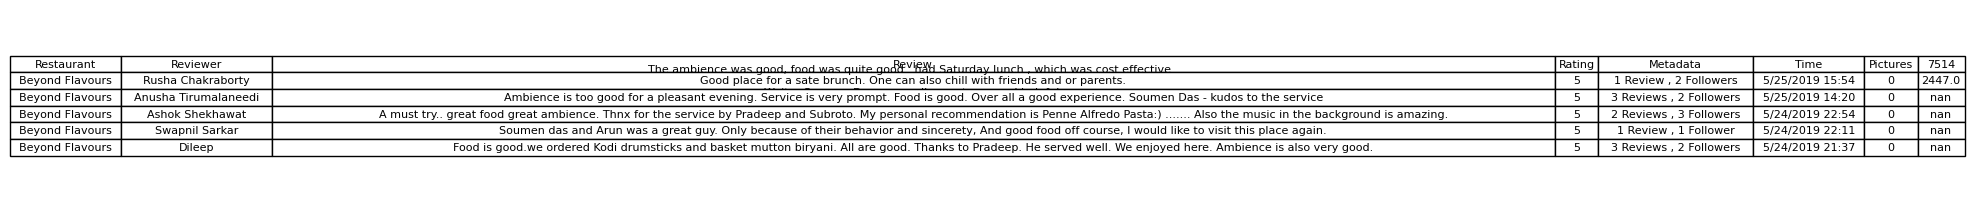

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükle
df = pd.read_csv("./dataset/restaurant_reviews.csv")

# Tabloyu PNG olarak kaydetmek
def save_table_as_png(dataframe, filename="table.png"):
    # Dinamik tablo boyutu, sütun genişliklerini ayarlamak için figsize'ı optimize ettik
    fig, ax = plt.subplots(figsize=(8, len(dataframe) * 0.5))  
    ax.axis('off')  # Eksenleri kapat
    ax.axis('tight')

    # DataFrame'i tabloya dönüştür
    table = ax.table(
        cellText=dataframe.values, 
        colLabels=dataframe.columns, 
        cellLoc='center', 
        loc='center'
    )
    table.auto_set_font_size(False)  # Otomatik font boyutunu kapat
    table.set_fontsize(8)  # Daha küçük font boyutu
    for col in range(len(dataframe.columns)):
        table.auto_set_column_width([col])  # Sütun genişliklerini manuel olarak ayarla

    # PNG olarak kaydet
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Tablo başarıyla {filename} dosyasına kaydedildi!")

# İlk 10 satırı PNG olarak kaydet
save_table_as_png(df.head(5), filename="restaurant_reviews_table.png")


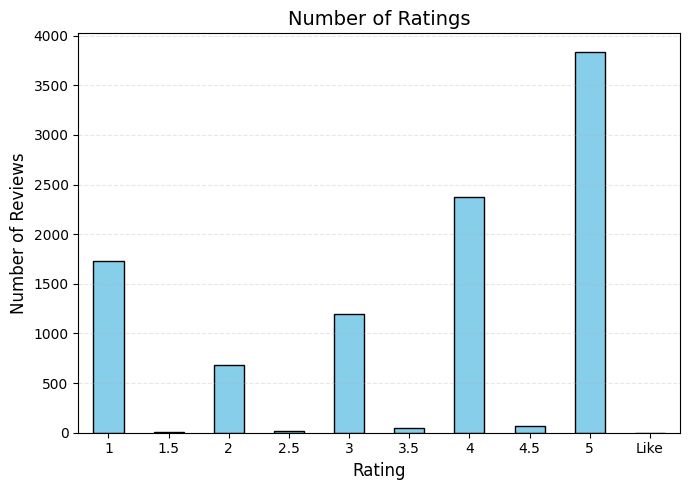

In [14]:
import matplotlib.pyplot as plt

rating_counts = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(7, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [15]:
print(df['Rating'].dtype)

# Rating sütununda farklı değerlere göz at
print(df['Rating'].unique())

object
['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


In [23]:
v = df[df['Rating'] == '4.5']
v.count()

Restaurant    69
Reviewer      69
Review        69
Rating        69
Metadata      69
Time          69
Pictures      69
7514           0
dtype: int64

In [18]:
v = df[df['Rating'] == 'Like']
v.count()

Restaurant    1
Reviewer      1
Review        1
Rating        1
Metadata      1
Time          1
Pictures      1
7514          0
dtype: int64

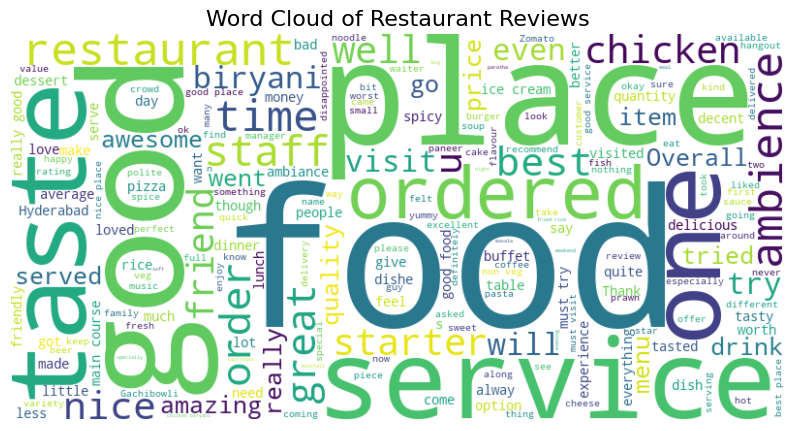

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Yorumlar sütunundaki tüm metinleri birleştir
all_reviews = " ".join(review for review in df['Review'].astype(str))

# Kelime bulutunu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_reviews)

# Kelime bulutunu görselleştir
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizle
plt.title('Word Cloud of Restaurant Reviews', fontsize=16)
plt.show()
